# Modèle 1: l'équilibre radiatif

## Présentation
Considérons une planète du système solaire (Terre, Mars ou Vénus). Cette planète reçoit une certaine quantité d'énergie solaire, fonction de sa distance au Soleil. Cette énergie dite incidente est interceptée par l'atmosphère planétaire. Les composés atmosphériques tels que les nuages et les gaz réfléchissent une partie de l'énergie incidente, qui est donc renvoyée vers l'espace. La fraction d'énergie solaire réfléchie sur l'énergie solaire reçue est appelée albedo. Ce paramètre varie selon la distance de la planète au Soleil et la composition de l'atmosphère planétaire. 

L'énergie restante est transformée en chaleur par les composés atmosphériques et la surface terrestre. La chaleur ainsi produite par la planète est rayonnée dans toutes les directions, y compris vers l'espace. Lorsque la planète est en équilibre, c'est-à-dire lorsque sa température est constante dans le temps, l'énergie solaire incidente est égale à l'énergie sortante, qui est la somme de l'énergie solaire réfléchie et de la chaleur émise par la planète. Ce modèle se propose de calculer la température d'équilibre radiatif d'une planète, en fonction de la quantité d'énergie solaire qu'elle reçoit. 

## Le modèle

In [10]:
import numpy
import matplotlib.pyplot as plt

def nakedplanet(alpha=0.3,L=1350):
    # PARAMETRES
    timeStep = 100          # years
    waterDepth = 4000       # meters
    Cp = waterDepth * 4.2E6 # J/K m2
    epsilon = 1
    sigma = 5.67E-8         # W/m2 K4
    Teq = ( L * (1 - alpha) / (4 * epsilon * sigma) ) ** (1/4)

    # INITIALISATION
    time = []
    temperature = []
    heatContent = []

    time.append(0)
    temperature.append(0)
    heatContent.append(Cp * temperature[0]) # J/m2
    heatIn = L * (1 - alpha) / 4
    heatOut = 0

    # INTEGRATION
    for it in range(1,100):
        time.append(time[it-1] + timeStep)
        heatOut = epsilon * sigma * temperature[it-1]**4
        heatContent.append( heatContent[it-1] + (heatIn - heatOut) * timeStep * 3.14E7)
        temperature.append( heatContent[it] / Cp )

    return temperature, time

## Application

In [11]:
## PARAMETRES DE MA PLANETE
alpha_random = 0.4
L_random = 3000
tempRandom, time = nakedplanet(alpha_random,L_random)

In [12]:
## LES AUTRES PLANETES
tempEarth, time1 = nakedplanet(0.3,1350)
tempVenus, time2 = nakedplanet(0.7,2600)
tempMars, time3 = nakedplanet(0.15,600)

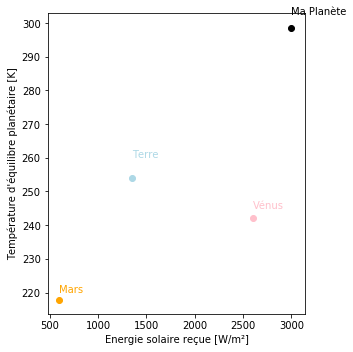

In [13]:
# FIGURE1 : énergie solaire reçue VS température d'équilibre
plt.figure(figsize=(5,5))
plt.scatter(600,tempMars[-1],color='orange')
plt.text(600,220,'Mars',color='orange')
plt.scatter(1350,tempEarth[-1],color='lightblue')
plt.text(1350,260,'Terre',color='lightblue')
plt.scatter(2600,tempVenus[-1],color='pink')
plt.text(2600,245,'Vénus',color='pink')
plt.scatter(L_random,tempRandom[-1],color='black')
plt.text(L_random,tempRandom[-1]+4,'Ma Planète',color='black')
plt.xlabel('Energie solaire reçue [W/m²]')
plt.ylabel('Température d' "'" 'équilibre planétaire [K]')
plt.tight_layout()
plt.show()

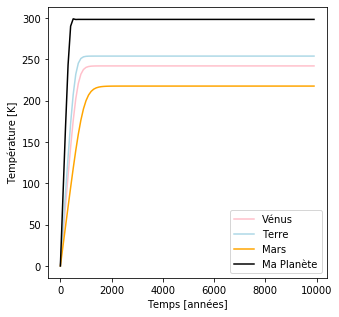

In [14]:
# FIGURE2 : temps de convergence vers la température d'équilibre
plt.figure(figsize=(5,5))
plt.plot(time,tempVenus,'pink',label='Vénus')
plt.plot(time,tempEarth,'lightblue',label='Terre')
plt.plot(time,tempMars,'orange',label='Mars')
plt.plot(time,tempRandom,'black',label='Ma Planète')
plt.xlabel('Temps [années]')
plt.ylabel('Température [K]')
plt.legend(loc='best')
plt.show()

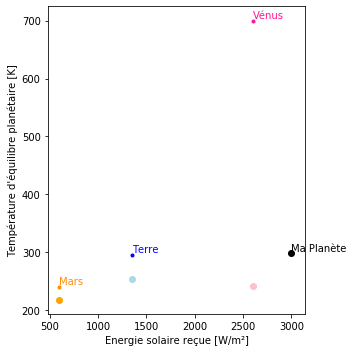

In [15]:
# FIGURE 3: comparaison des températures évaluées par le modèle et des températures réelles
plt.figure(figsize=(5,5))
plt.scatter(600,tempMars[-1],color='orange')
plt.scatter(600,240,marker='.',color='darkorange')
plt.text(600,245,'Mars',color='darkorange')
plt.scatter(1350,tempEarth[-1],color='lightblue')
plt.scatter(1350,295,marker='.',color='blue')
plt.text(1350,300,'Terre',color='blue')
plt.scatter(2600,tempVenus[-1],color='pink')
plt.scatter(2600,700,marker='.',color='deeppink')
plt.text(2600,705,'Vénus',color='deeppink')
plt.scatter(L_random,tempRandom[-1],color='black')
plt.text(L_random,tempRandom[-1]+4,'Ma Planète',color='black')
plt.xlabel('Energie solaire reçue [W/m²]')
plt.ylabel('Température d' "'" 'équilibre planétaire [K]')
plt.tight_layout()
plt.show()